# Single Dot Transport

This notebook deals with transport through a single dot using a Master equation model.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('/Users/sandesh/repos/quantum-ml/Nanowire Model/')
import potential_profile
import thomas_fermi

## Potential Profile

The system is assumed to extend from along x. Three gates are present; two define the barrier and one controls the depth of the potential well.

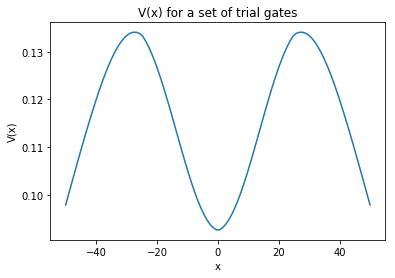

In [125]:
N_grid = 100
x = np.linspace(-50,50,N_grid,endpoint=True)

# potential profile
param1 = [200e-3,-25,25,100,1000]
param2 = [-200e-3,0,25,100,1000]
param3 = [200e-3,25,25,100,1000]
gates = [param1,param2,param3] 

V = potential_profile.calc_V(x,gates)
plt.plot(x,V)
plt.xlabel('x')
plt.ylabel('V(x)')
plt.title("V(x) for a set of trial gates");

islands []
barriers []
WKB Probability []
charges []
cap_model (array([], dtype=float64), array([], shape=(0, 0), dtype=float64))
cap matrix []
stable_config []
current 1.0
graph charge 0.0


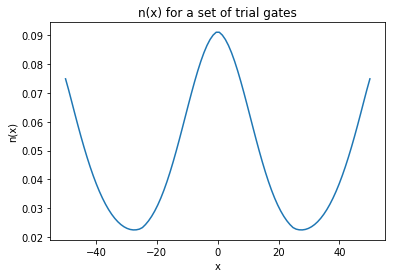

In [128]:
physics = {'x' : x,
           'V' : V,
           'K_0' : 1.0e-2, 
           'sigma' : 1,
           'mu' : 0.10,
           'D' : 2,
           'g_0' : 5e-2,
           'c_k' : 1e-3,
           'beta' : 50,
           'kT' : 1e-5,
           'WKB_coeff' : 0.1,
           'barrier_tunnel_rate' : 10.0,
           'bias' : 1e-4,
           'ShortCircuitCurrent' : 1.0,
           'attempt_rate_coef' : 1
            }

tf = thomas_fermi.ThomasFermi(physics)
n = tf.calc_n()
islands = tf.calc_islands()
barriers = tf.calc_barriers()
p_WKB = tf.calc_WKB_prob()
charges = tf.calc_charges()
cap_model = tf.calc_cap_model()
stable_config = tf.calc_stable_config()
current = tf.calc_current()
graph_charge = tf.calc_graph_charge()

print("islands",islands)
print("barriers",barriers)
print("WKB Probability",p_WKB)
print("charges",charges)
print("cap_model",cap_model)
print("cap matrix",np.linalg.inv(cap_model[1]))
print("stable_config",stable_config)
print("current",current)
print("graph charge",graph_charge)


plt.plot(x,n)
plt.xlabel('x')
plt.ylabel('n(x)')
plt.title("n(x) for a set of trial gates");

In [122]:
V_gate = np.linspace(-150e-3,-210e-3,200)

def wrapper(V_gate):
    param1 = [200e-3,-25,25,50,1000]
    param2 = [V_gate,0,25,50,1000]
    param3 = [200e-3,30,25,50,1000]
    trial_gates = [param1,param2,param3]
    V = potential_profile.calc_V(x,trial_gates) 
    physics['V'] = V
    
    tf = thomas_fermi.ThomasFermi(physics)
    n = tf.calc_n()
    islands = tf.calc_islands()
    barriers = tf.calc_barriers()
    p_WKB = tf.calc_WKB_prob()
    charges = tf.calc_charges()
    cap_model = tf.calc_cap_model()
    stable_config = tf.calc_stable_config()
    current = tf.calc_current()
    charge = tf.calc_graph_charge()
    
    return current,charge,cap_model

res = [wrapper(y) for y in V_gate]
I = np.array([y[0] for y in res])
charge = np.array([np.sum(y[1]) for y in res])

plt.figure(1)
plt.plot(V_gate,I)
plt.xlabel('V_g')
plt.ylabel('Current')

plt.figure(2)
plt.plot(V_gate,charge)
plt.xlabel('V_g')
plt.ylabel('Charge')



AttributeError: 'ThomasFermi' object has no attribute 'dist'

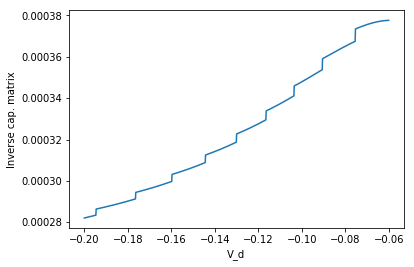

In [273]:
plt.plot(V_gate,[x[2][1][0] for x in res])
plt.xlabel('V_d')
plt.ylabel("Inverse cap. matrix")

In [252]:
res[2]


(2.7130322805249771e-05, (2,), (array([ 1.74541026]), array([[ 0.00026103]])))